<a href="https://colab.research.google.com/github/lisavanloon/fluffy-happiness/blob/master/Wk5_Prog_LVL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 - Programming

The code cells below perform a logistic regression on the Birthweight data. 

Add comments to make the code more understandable. Why are certain libraries being imported? When is each function used? For strange functions, describe what they do. Briefly explain the logic behind steps where necessary. Break up code chunks so that each block accomplishes one task, and label the block with that task. If a task takes more than one or two lines to explain, add a text cell prior to the code cell.

Do *not* write a novel! Comments should be concise and informative. Remember - all code has at least two authors: you, and you in the future. Make the comments short enough that future you would actually read them, only put them in places where future you might forget the purpose of some code, and make sure they are informative. 

To submit this assignment, either copy this notebook to google colab and copy the link into the submission area (**make sure you enable sharing in the notebook when you copy the link**), or download the .ipynb file and submit it as an attachment.

In [ ]:
# Import libraries
import pandas as pd  #for data manipulation and analysis of numerical tables
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

Data Dictionary:

| Variable | Description |
|---|---|
| ID | Baby number |
| length | Length of baby (cm) |
| Birthweight | Weight of baby (kg) |
| headcirumference | Head Circumference |
| Gestation | Gestation (weeks) |
| smoker | Mother smokes 1 = smoker 0 = non-smoker |
| motherage | Maternal age |
| mnocig | Number of cigarettes smoked per day by mother |
| mheight | Mothers height (cm) |
| mppwt | Mothers pre-pregnancy weight (kg) |
| fage | Father's age|
| fedyrs | Father’s years in education |
| fnocig | Number of cigarettes smoked per day by father |
| fheight | Father's height (kg) |
| lowbwt | Low birth weight, 0 = No and 1 = yes |
| mage35 | Mother over 35, 0 = No and 1 = yes |

Source: [https://www.sheffield.ac.uk/mash/statistics/datasets](https://www.sheffield.ac.uk/mash/statistics/datasets)



In [ ]:
# Import data
birth = pd.read_csv("https://github.com/DS-Without-Tears/DS-Without-Tears/raw/main/data/Birthweight_reduced_R.csv")
print(birth.columns)
birth.describe()

Index(['id', 'headcircumference', 'length', 'Birthweight', 'Gestation',
       'smoker', 'motherage', 'mnocig', 'mheight', 'mppwt', 'fage', 'fedyrs',
       'fnocig', 'fheight', 'lowbwt', 'mage35', 'LowBirthWeight'],
      dtype='object')


,id,headcircumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,13.261905,19.928571,7.264286,39.190476,0.523810,25.547619,9.428571,64.404762,125.857143,28.904762,13.666667,17.190476,70.761905,0.142857,0.095238
std,467.616186,0.766987,1.112958,1.329739,2.643336,0.505487,5.666342,12.511737,2.547687,15.879994,6.863866,2.160247,17.308165,2.843988,0.354169,0.297102
min,27.000000,12.000000,17.000000,4.200000,33.000000,0.000000,18.000000,0.000000,58.000000,99.000000,19.000000,10.000000,0.000000,66.000000,0.000000,0.000000
25%,537.250000,13.000000,19.000000,6.450000,38.000000,0.000000,20.250000,0.000000,63.000000,115.000000,23.000000,12.000000,0.000000,69.000000,0.000000,0.000000
50%,821.000000,13.000000,20.000000,7.250000,39.500000,1.000000,24.000000,4.500000,64.000000,125.000000,29.500000,14.000000,18.500000,71.000000,0.000000,0.000000
75%,1269.500000,14.000000,21.000000,8.000000,41.000000,1.000000,29.000000,15.750000,66.000000,135.000000,32.000000,16.000000,25.000000,72.000000,0.000000,0.000000
max,1764.000000,15.000000,22.000000,10.000000,45.000000,1.000000,41.000000,50.000000,71.000000,170.000000,46.000000,16.000000,50.000000,78.000000,1.000000,1.000000


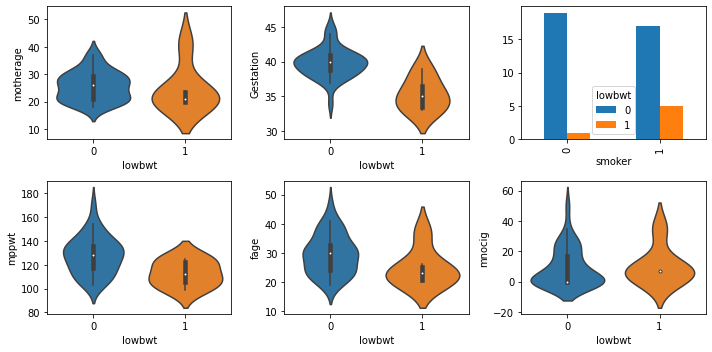

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

sns.violinplot(y = "motherage", x = "lowbwt", data = birth, ax = axes[0, 0])
sns.violinplot(y = "Gestation", x = "lowbwt", data = birth, ax = axes[0, 1])
pd.crosstab(birth["smoker"], birth["lowbwt"]).plot(kind="bar", ax=axes[0,2])
#sns.barplot(x = "smoker", hue = "lowbwt", data = birth, ax = axes[0, 2])
sns.violinplot(y = "mppwt", x = "lowbwt", data = birth, ax = axes[1, 0])
sns.violinplot(y = "fage", x = "lowbwt", data = birth, ax = axes[1, 1])
sns.violinplot(y = "mnocig", x = "lowbwt", data = birth, ax = axes[1, 2])
plt.tight_layout() # Alternative to plt.show - prevents axis labels from overlapping




[[-1.09376326  0.66688779 -0.55564688 -0.88007165]]


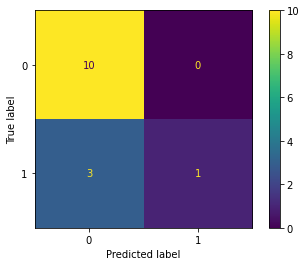

In [ ]:
X = birth[["Gestation", "smoker", "mppwt", "fage"]]
X = StandardScaler().fit_transform(X)
y = birth["lowbwt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

blogist = LogisticRegression().fit(X_train, y_train)

print(blogist.coef_)

plot_confusion_matrix(blogist, X_test, y_test)
plt.show()
